## Imports

In [2]:
import torch
import sys
import torchvision
import pytorch_lightning as pl
import numpy as np
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Parameter Initialization

In [1]:
from torch.utils.data import Dataset, DataLoader
import os

# DEFAULT_ROOT = '/scratch/sagar/slf/train_set/set_harsh_torch_raw_unnormalized/slf_mat'

DEFAULT_ROOT = '/scratch/sagar/slf/train_set/2m_data/slf_mat'

class SLF(Dataset):
    def __init__(self, root=DEFAULT_ROOT, train=True, download=True, transform=None, total_data=None, sampling=False, normalize=False):
        self.root_dir = root
        self.train = train
        self.test_id = 0
        if not total_data is None:
            self.num_examples = total_data
        else:
            if train == True:
                self.num_examples = 1900000
            else:
                self.num_examples = 2000
                self.test_id = 1900000
        
        self.sampling = sampling
        sample_size = [0.01,0.30]
        self.sampling_rate = sample_size[1] - sample_size[0]
        self.omega_start_point = 1.0 - sample_size[1]
        self.normalize = normalize
        
    def __len__(self):
        return self.num_examples

    def __getitem__(self, idx):
        if self.train:
            filename = os.path.join(self.root_dir, str(idx)+'.pt')
        else:
            filename = os.path.join(self.root_dir, str(self.test_id + idx)+'.pt')
            
        sample = torch.load(filename)
        if self.sampling:
            rand = self.sampling_rate*torch.rand(1).item()
            bool_mask = torch.FloatTensor(1,51,51).uniform_() > (self.omega_start_point+rand)
            int_mask = bool_mask*torch.ones((1,51,51), dtype=torch.float32)
            subsample = sample*bool_mask
            return subsample, sample
        
        if self.normalize:
            sample = np.log(sample)
            sample = sample/sample.min()
        return sample

def plot_image(train_set, index, log=False):
    a = train_set[index]
    if not log:
        plt.imshow(a.detach().squeeze().numpy())
    else:
        plt.imshow(np.log(a.detach().squeeze().numpy()))
        

def plot_image_output(image, log=False):
    if log:
        plt.imshow(np.log(image.detach().squeeze().numpy()))
    else:
        plt.imshow(image.detach().squeeze().numpy())
    
import os
# Insert your own path here

variation = "B-VAE"

ds_path = os.path.join(".", "drive", "My Drive", "Machine Learning", "Datasets")
# ds_path = DEFAULT_ROOT

configuration = {
    "dataset": "CIFAR10",
    "path": ds_path
}

# configuration = {
#     "dataset": "SLF",
#     "path": ds_path
# }

# big model vae
# architecture = {
#     "conv_layers": 7,
#     "conv_channels": [16, 32, 64, 128, 256, 512, 1024],
#     "conv_kernel_sizes": [(4, 4), (4, 4), (4, 4), (4, 4), (4,4), (4,4), (4,4)],
#     "conv_strides": [(1, 1), (2, 2), (2, 2), (1, 1), (2,2), (2,2), (2,2)],
#     "conv_paddings": [(1, 1), (1, 1), (1, 1), (1, 1), (1,1), (1,1), (1,1)],
#     "z_dimension": 16
# }


# architecture = {
#     "conv_layers": 5,
#     "conv_channels": [16, 32, 64, 128, 256],
#     "conv_kernel_sizes": [(4, 4), (4, 4), (4, 4), (4, 4), (4,4)],
#     "conv_strides": [(1, 1), (2, 2), (2, 2), (1, 1), (2,2)],
#     "conv_paddings": [(1, 1), (1, 1), (1, 1), (1, 1), (1,1)],
#     "z_dimension": 128
# }


architecture = {
    "conv_layers": 3,
    "conv_channels": [32, 64, 128],
    "conv_kernel_sizes": [(4, 4), (4, 4), (4, 4)],
    "conv_strides": [(1, 1), (2, 2), (1, 1)],
    "conv_paddings": [(1, 1), (1, 1), (1, 1)],
    "z_dimension": 64
}


hyperparameters = {
    "epochs": 10,
    "batch_size": 128,
    "learning_rate": 1e-5,
    "beta": 1
}

def prepare_dataset(configuration):
    """
    :param dict configuration: The configuration dictionary returned by parse_config_file

    :return:        A dictionary containing information about the dataset used

    Function used to set some values used by the model based on the dataset selected
    """
    dataset_info = {}
    dataset_info['ds_name'] = configuration['dataset']
    
    if (configuration["dataset"] == "MNIST"):
        dataset_info["ds_method"] = torchvision.datasets.MNIST
        dataset_info["ds_shape"] = (1, 28, 28)
        dataset_info["ds_path"] = configuration["path"]
    elif (configuration["dataset"] == "CIFAR10"):
        dataset_info["ds_method"] = torchvision.datasets.CIFAR10
        dataset_info["ds_shape"] = (3, 32, 32)
        dataset_info["ds_path"] = configuration["path"]
    elif (configuration["dataset"] == "FashionMNIST"):
        dataset_info["ds_method"] = torchvision.datasets.FashionMNIST
        dataset_info["ds_shape"] = (1, 28, 28)
        dataset_info["ds_path"] = configuration["path"]
    elif configuration['dataset'] == 'SLF':
        dataset_info['ds_method'] = SLF
        dataset_info['ds_shape'] = (1, 51, 51)
        dataset_info['ds_path'] = configuration['path']
    else:
        print("Currently only MNIST & CIFAR10 datasets are supported")
        return None

    return dataset_info

dataset_info = prepare_dataset(configuration)

NameError: name 'torchvision' is not defined

In [3]:
a = torch.load('/scratch/sagar/slf/train_set/2m_data/slf_mat/1900000.pt')

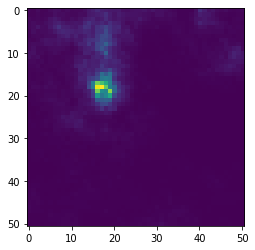

In [79]:
SRC = '/scratch/sagar/slf/2m_data'
TARGET = '/scratch/sagar/slf/train_set/2m_data'

train_set = SLF(os.path.join(TARGET, 'slf_mat'), train=True)
# from slf_dataset import SLFDatasetMatTrue 

# train_set = SLFDatasetMatTrue(root_dir=os.path.join(SRC, 'slf_mat'), 
#                     csv_file=os.path.join(SRC, 'details.csv'), raw_format=True)

a = train_set[5]
import matplotlib.pyplot as plt

plt.imshow((a.squeeze().numpy()))

# Model Training

### Trainer Initialization

In [5]:
from pytorch_lightning import Trainer
from networks.vae import VAE, betaVAE
import numpy as np
   
model = None
if (variation == "VAE"):
  model = VAE(architecture, hyperparameters, dataset_info)
elif (variation == "B-VAE"):
  model = betaVAE(architecture, hyperparameters, dataset_info)

trainer = Trainer(max_epochs = hyperparameters["epochs"], gpus=1, progress_bar_refresh_rate=20)

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


### Model fitting (training)

In [6]:
trainer.fit(model)


  | Name          | Type       | Params
---------------------------------------------
0 | encoder       | Sequential | 166 K 
1 | mean_layer    | Linear     | 1.6 M 
2 | std_layer     | Linear     | 1.6 M 
3 | decoder_input | Linear     | 1.6 M 
4 | decoder       | Sequential | 426 K 
5 | output_layer  | Sequential | 18.0 K
---------------------------------------------
5.5 M     Trainable params
0         Non-trainable params
5.5 M     Total params


Files already downloaded and verified


Training: |          | 0/? [00:00<?, ?it/s]

beta*KL: 16.804241180419922 Data Fidelity: -2253.51953125
beta*KL: 16.259305953979492 Data Fidelity: -2250.18115234375
beta*KL: 15.885330200195312 Data Fidelity: -2244.276611328125
beta*KL: 16.05868148803711 Data Fidelity: -2245.84521484375
beta*KL: 15.878850936889648 Data Fidelity: -2240.1875
beta*KL: 15.449801445007324 Data Fidelity: -2236.8876953125
beta*KL: 16.283594131469727 Data Fidelity: -2232.093017578125
beta*KL: 16.495162963867188 Data Fidelity: -2227.87060546875
beta*KL: 17.200557708740234 Data Fidelity: -2226.364990234375
beta*KL: 17.566734313964844 Data Fidelity: -2219.34912109375
beta*KL: 17.70813751220703 Data Fidelity: -2216.07958984375
beta*KL: 18.391521453857422 Data Fidelity: -2212.3916015625
beta*KL: 19.533832550048828 Data Fidelity: -2209.710693359375
beta*KL: 19.361934661865234 Data Fidelity: -2211.6142578125
beta*KL: 20.157909393310547 Data Fidelity: -2201.482177734375
beta*KL: 21.02715492248535 Data Fidelity: -2194.8388671875
beta*KL: 20.995920181274414 Data Fid

beta*KL: 18.71548843383789 Data Fidelity: -1904.194580078125
beta*KL: 18.730022430419922 Data Fidelity: -1934.79443359375
beta*KL: 18.53957748413086 Data Fidelity: -1931.999755859375
beta*KL: 19.208688735961914 Data Fidelity: -1938.78125
beta*KL: 19.69232940673828 Data Fidelity: -1919.451171875
beta*KL: 18.827653884887695 Data Fidelity: -1923.642822265625
beta*KL: 18.967390060424805 Data Fidelity: -1917.2845458984375
beta*KL: 19.547534942626953 Data Fidelity: -1907.8995361328125
beta*KL: 18.23406982421875 Data Fidelity: -1911.8316650390625
beta*KL: 18.15435028076172 Data Fidelity: -1943.81884765625
beta*KL: 18.543476104736328 Data Fidelity: -1926.1280517578125
beta*KL: 18.86426544189453 Data Fidelity: -1929.4520263671875
beta*KL: 19.344955444335938 Data Fidelity: -1907.7247314453125
beta*KL: 18.640357971191406 Data Fidelity: -1917.114990234375
beta*KL: 18.084796905517578 Data Fidelity: -1912.37939453125
beta*KL: 19.536048889160156 Data Fidelity: -1911.155517578125
beta*KL: 18.317754745

beta*KL: 13.783998489379883 Data Fidelity: -1866.4366455078125
beta*KL: 14.154279708862305 Data Fidelity: -1875.196044921875
beta*KL: 14.301948547363281 Data Fidelity: -1870.499755859375
beta*KL: 13.890656471252441 Data Fidelity: -1887.210693359375
beta*KL: 13.8394193649292 Data Fidelity: -1887.01611328125
beta*KL: 13.866365432739258 Data Fidelity: -1878.5904541015625
beta*KL: 13.88705825805664 Data Fidelity: -1883.755615234375
beta*KL: 14.32114315032959 Data Fidelity: -1863.886962890625
beta*KL: 13.278945922851562 Data Fidelity: -1830.3209228515625
beta*KL: 14.108165740966797 Data Fidelity: -1862.3135986328125
beta*KL: 12.99127197265625 Data Fidelity: -1857.19677734375
beta*KL: 13.00859260559082 Data Fidelity: -1885.92529296875
beta*KL: 13.463479995727539 Data Fidelity: -1853.1612548828125
beta*KL: 13.452093124389648 Data Fidelity: -1850.529541015625
beta*KL: 13.226489067077637 Data Fidelity: -1866.602294921875
beta*KL: 13.38519287109375 Data Fidelity: -1853.682373046875
beta*KL: 12.5

beta*KL: 10.630659103393555 Data Fidelity: -1834.4935302734375
beta*KL: 10.411161422729492 Data Fidelity: -1846.299560546875
beta*KL: 10.406705856323242 Data Fidelity: -1805.52978515625
beta*KL: 10.554686546325684 Data Fidelity: -1844.1671142578125
beta*KL: 10.021260261535645 Data Fidelity: -1820.33544921875
beta*KL: 10.62646770477295 Data Fidelity: -1817.159912109375
beta*KL: 10.916251182556152 Data Fidelity: -1859.0274658203125
beta*KL: 10.470968246459961 Data Fidelity: -1846.090576171875
beta*KL: 10.053426742553711 Data Fidelity: -1851.109375
beta*KL: 10.83305835723877 Data Fidelity: -1836.563232421875
beta*KL: 10.466991424560547 Data Fidelity: -1821.470703125
beta*KL: 10.288901329040527 Data Fidelity: -1841.408447265625
beta*KL: 10.572173118591309 Data Fidelity: -1827.100341796875
beta*KL: 10.43310832977295 Data Fidelity: -1846.394287109375
beta*KL: 11.006373405456543 Data Fidelity: -1843.7099609375
beta*KL: 11.052606582641602 Data Fidelity: -1845.25146484375
beta*KL: 10.1463813781

beta*KL: 8.726601600646973 Data Fidelity: -1823.5626220703125
beta*KL: 8.593653678894043 Data Fidelity: -1799.3427734375
beta*KL: 8.803731918334961 Data Fidelity: -1818.350341796875
beta*KL: 9.013174057006836 Data Fidelity: -1822.876953125
beta*KL: 8.43651008605957 Data Fidelity: -1792.8968505859375
beta*KL: 8.796895027160645 Data Fidelity: -1811.851318359375
beta*KL: 9.016416549682617 Data Fidelity: -1835.209228515625
beta*KL: 9.091367721557617 Data Fidelity: -1817.8328857421875
beta*KL: 8.213823318481445 Data Fidelity: -1833.29931640625
beta*KL: 8.415815353393555 Data Fidelity: -1825.6468505859375
beta*KL: 8.287555694580078 Data Fidelity: -1787.1749267578125
beta*KL: 8.858421325683594 Data Fidelity: -1857.4228515625
beta*KL: 8.781335830688477 Data Fidelity: -1836.470947265625
beta*KL: 8.324302673339844 Data Fidelity: -1836.392578125
beta*KL: 9.32303237915039 Data Fidelity: -1838.9207763671875
beta*KL: 8.242945671081543 Data Fidelity: -1819.5572509765625
beta*KL: 8.79152774810791 Data

beta*KL: 7.245378494262695 Data Fidelity: -1822.639404296875
beta*KL: 7.863279342651367 Data Fidelity: -1814.734130859375
beta*KL: 7.506341934204102 Data Fidelity: -1794.576416015625
beta*KL: 7.254063606262207 Data Fidelity: -1815.8792724609375
beta*KL: 7.228813648223877 Data Fidelity: -1831.26416015625
beta*KL: 8.126155853271484 Data Fidelity: -1838.953369140625
beta*KL: 6.984601020812988 Data Fidelity: -1780.303466796875
beta*KL: 7.982566833496094 Data Fidelity: -1774.5379638671875
beta*KL: 8.064315795898438 Data Fidelity: -1821.3345947265625
beta*KL: 8.329730987548828 Data Fidelity: -1822.800048828125
beta*KL: 7.84316873550415 Data Fidelity: -1789.752197265625
beta*KL: 7.495296478271484 Data Fidelity: -1814.4259033203125
beta*KL: 7.154647350311279 Data Fidelity: -1804.828125
beta*KL: 7.065071105957031 Data Fidelity: -1831.8525390625
beta*KL: 7.351088523864746 Data Fidelity: -1773.4945068359375
beta*KL: 7.300848007202148 Data Fidelity: -1823.42431640625
beta*KL: 7.26641845703125 Data

beta*KL: 6.521381855010986 Data Fidelity: -1837.3739013671875
beta*KL: 6.553110122680664 Data Fidelity: -1812.3577880859375
beta*KL: 6.736789703369141 Data Fidelity: -1834.806640625
beta*KL: 6.471187591552734 Data Fidelity: -1801.2269287109375
beta*KL: 6.431489944458008 Data Fidelity: -1797.890625
beta*KL: 6.662140846252441 Data Fidelity: -1795.025146484375
beta*KL: 6.794449806213379 Data Fidelity: -1782.556396484375
beta*KL: 6.142801284790039 Data Fidelity: -1768.376220703125
beta*KL: 6.771395683288574 Data Fidelity: -1831.310546875
beta*KL: 6.688307762145996 Data Fidelity: -1811.5679931640625
beta*KL: 6.394965171813965 Data Fidelity: -1826.0054931640625
beta*KL: 6.004718780517578 Data Fidelity: -1780.39208984375
beta*KL: 6.516824722290039 Data Fidelity: -1816.6041259765625
beta*KL: 6.321327209472656 Data Fidelity: -1801.1103515625
beta*KL: 6.8441009521484375 Data Fidelity: -1828.531494140625
beta*KL: 6.722997188568115 Data Fidelity: -1816.1153564453125
beta*KL: 6.511653900146484 Data

beta*KL: 5.879485130310059 Data Fidelity: -1819.928466796875
beta*KL: 6.2405548095703125 Data Fidelity: -1810.4349365234375
beta*KL: 5.86083984375 Data Fidelity: -1781.3765869140625
beta*KL: 5.575740814208984 Data Fidelity: -1781.8638916015625
beta*KL: 5.9610185623168945 Data Fidelity: -1784.9647216796875
beta*KL: 5.833614826202393 Data Fidelity: -1827.8739013671875
beta*KL: 6.091508388519287 Data Fidelity: -1802.3228759765625
beta*KL: 5.780502796173096 Data Fidelity: -1790.8214111328125
beta*KL: 6.054876327514648 Data Fidelity: -1784.1693115234375
beta*KL: 6.077385425567627 Data Fidelity: -1778.21484375
beta*KL: 6.159008979797363 Data Fidelity: -1803.326171875
beta*KL: 5.682159423828125 Data Fidelity: -1813.359375
beta*KL: 5.564145088195801 Data Fidelity: -1753.55126953125
beta*KL: 6.183711051940918 Data Fidelity: -1801.513916015625
beta*KL: 5.552382946014404 Data Fidelity: -1805.24951171875
beta*KL: 5.187444686889648 Data Fidelity: -1778.04248046875
beta*KL: 5.9113898277282715 Data F

beta*KL: 5.081514358520508 Data Fidelity: -1792.642822265625
beta*KL: 5.036643028259277 Data Fidelity: -1796.4796142578125
beta*KL: 5.675273418426514 Data Fidelity: -1793.0386962890625
beta*KL: 5.413451671600342 Data Fidelity: -1796.468505859375
beta*KL: 5.65035343170166 Data Fidelity: -1769.1611328125
beta*KL: 5.755681991577148 Data Fidelity: -1837.512451171875
beta*KL: 5.842883110046387 Data Fidelity: -1791.2130126953125
beta*KL: 5.334988594055176 Data Fidelity: -1805.513671875
beta*KL: 5.947991371154785 Data Fidelity: -1795.73681640625
beta*KL: 5.817624568939209 Data Fidelity: -1785.516845703125
beta*KL: 5.7226362228393555 Data Fidelity: -1808.696533203125
beta*KL: 5.942702770233154 Data Fidelity: -1838.1103515625
beta*KL: 5.824804782867432 Data Fidelity: -1787.9586181640625
beta*KL: 5.309542655944824 Data Fidelity: -1800.937744140625
beta*KL: 5.798709869384766 Data Fidelity: -1808.1573486328125
beta*KL: 5.907863140106201 Data Fidelity: -1777.336669921875
beta*KL: 5.734911918640137 

beta*KL: 5.031599044799805 Data Fidelity: -1798.1094970703125
beta*KL: 5.321056842803955 Data Fidelity: -1791.3614501953125
beta*KL: 5.067941188812256 Data Fidelity: -1779.781005859375
beta*KL: 4.94390344619751 Data Fidelity: -1763.314208984375
beta*KL: 5.416088104248047 Data Fidelity: -1798.4847412109375
beta*KL: 5.076145648956299 Data Fidelity: -1793.556396484375
beta*KL: 5.157256126403809 Data Fidelity: -1791.2698974609375
beta*KL: 5.065794944763184 Data Fidelity: -1802.963623046875
beta*KL: 5.415350914001465 Data Fidelity: -1824.7574462890625
beta*KL: 5.3220014572143555 Data Fidelity: -1770.5400390625
beta*KL: 5.2219648361206055 Data Fidelity: -1836.2288818359375
beta*KL: 5.316569805145264 Data Fidelity: -1790.53466796875
beta*KL: 5.057375907897949 Data Fidelity: -1785.83203125
beta*KL: 5.080982208251953 Data Fidelity: -1765.4451904296875
beta*KL: 5.291438579559326 Data Fidelity: -1800.84228515625
beta*KL: 5.588340759277344 Data Fidelity: -1829.704345703125
beta*KL: 5.2658801078796

beta*KL: 4.726834774017334 Data Fidelity: -1825.1329345703125
beta*KL: 4.769484996795654 Data Fidelity: -1791.734619140625
beta*KL: 4.937607288360596 Data Fidelity: -1783.93408203125
beta*KL: 5.057005882263184 Data Fidelity: -1813.9912109375
beta*KL: 4.815958499908447 Data Fidelity: -1788.2987060546875
beta*KL: 4.823214530944824 Data Fidelity: -1795.7117919921875
beta*KL: 5.280518531799316 Data Fidelity: -1763.96142578125
beta*KL: 5.32917594909668 Data Fidelity: -1793.0216064453125
beta*KL: 5.162033557891846 Data Fidelity: -1810.09814453125
beta*KL: 4.873366355895996 Data Fidelity: -1780.34619140625
beta*KL: 4.736737251281738 Data Fidelity: -1796.7265625
beta*KL: 5.226899147033691 Data Fidelity: -1807.453369140625
beta*KL: 5.128547668457031 Data Fidelity: -1821.5146484375
beta*KL: 4.915826797485352 Data Fidelity: -1781.154296875
beta*KL: 4.866775989532471 Data Fidelity: -1768.64404296875
beta*KL: 4.819293022155762 Data Fidelity: -1790.250732421875
beta*KL: 4.872696399688721 Data Fideli

beta*KL: 4.807289123535156 Data Fidelity: -1768.02734375
beta*KL: 4.585089683532715 Data Fidelity: -1753.4287109375
beta*KL: 4.713442325592041 Data Fidelity: -1764.5009765625
beta*KL: 4.884075164794922 Data Fidelity: -1813.6842041015625
beta*KL: 4.849374771118164 Data Fidelity: -1814.339111328125
beta*KL: 4.797150135040283 Data Fidelity: -1776.203857421875
beta*KL: 4.979848384857178 Data Fidelity: -1782.335205078125
beta*KL: 4.7764482498168945 Data Fidelity: -1784.797607421875
beta*KL: 4.710441589355469 Data Fidelity: -1786.4544677734375
beta*KL: 4.1643385887146 Data Fidelity: -1752.96484375
beta*KL: 4.545872211456299 Data Fidelity: -1779.893310546875
beta*KL: 5.09565544128418 Data Fidelity: -1818.900146484375
beta*KL: 4.634944915771484 Data Fidelity: -1787.62060546875
beta*KL: 4.643592357635498 Data Fidelity: -1769.843017578125
beta*KL: 4.927191734313965 Data Fidelity: -1803.676025390625
beta*KL: 4.865134239196777 Data Fidelity: -1838.803955078125
beta*KL: 4.552502632141113 Data Fidel

beta*KL: 4.364345550537109 Data Fidelity: -1768.392333984375
beta*KL: 4.565471172332764 Data Fidelity: -1743.45068359375
beta*KL: 4.279523849487305 Data Fidelity: -1788.6749267578125
beta*KL: 4.34883975982666 Data Fidelity: -1767.3402099609375
beta*KL: 4.393949508666992 Data Fidelity: -1794.97998046875
beta*KL: 4.186181545257568 Data Fidelity: -1786.17431640625
beta*KL: 4.506045341491699 Data Fidelity: -1798.9727783203125
beta*KL: 4.370174407958984 Data Fidelity: -1799.4462890625
beta*KL: 4.477293491363525 Data Fidelity: -1761.5369873046875
beta*KL: 4.513445854187012 Data Fidelity: -1826.402099609375
beta*KL: 4.327505111694336 Data Fidelity: -1797.9202880859375
beta*KL: 4.324748516082764 Data Fidelity: -1778.909912109375
beta*KL: 4.389667510986328 Data Fidelity: -1784.791015625
beta*KL: 4.459537506103516 Data Fidelity: -1786.5501708984375
beta*KL: 4.2482686042785645 Data Fidelity: -1767.123046875
beta*KL: 4.598965644836426 Data Fidelity: -1764.811767578125
beta*KL: 4.263457775115967 Da

beta*KL: 4.863185882568359 Data Fidelity: -1791.95263671875
beta*KL: 4.388552188873291 Data Fidelity: -1750.66552734375
beta*KL: 4.22065544128418 Data Fidelity: -1775.05126953125
beta*KL: 4.549255847930908 Data Fidelity: -1776.0821533203125
beta*KL: 4.15998649597168 Data Fidelity: -1774.285400390625
beta*KL: 4.188491344451904 Data Fidelity: -1742.0662841796875
beta*KL: 4.445484638214111 Data Fidelity: -1765.615478515625
beta*KL: 4.3531951904296875 Data Fidelity: -1728.3057861328125
beta*KL: 4.451154708862305 Data Fidelity: -1780.31103515625
beta*KL: 4.357268333435059 Data Fidelity: -1778.1329345703125
beta*KL: 4.2486419677734375 Data Fidelity: -1783.2860107421875
beta*KL: 4.427055835723877 Data Fidelity: -1821.39599609375
beta*KL: 4.460707187652588 Data Fidelity: -1778.2578125
beta*KL: 4.336581230163574 Data Fidelity: -1796.7213134765625
beta*KL: 4.469745635986328 Data Fidelity: -1844.92529296875
beta*KL: 4.087482452392578 Data Fidelity: -1765.5411376953125
beta*KL: 4.068955421447754 D

beta*KL: 3.899322032928467 Data Fidelity: -1760.2376708984375
beta*KL: 4.5151519775390625 Data Fidelity: -1778.374267578125
beta*KL: 4.309125900268555 Data Fidelity: -1801.9058837890625
beta*KL: 4.461050987243652 Data Fidelity: -1803.595947265625
beta*KL: 4.362403392791748 Data Fidelity: -1778.8525390625
beta*KL: 4.100059986114502 Data Fidelity: -1749.41357421875
beta*KL: 4.365896224975586 Data Fidelity: -1797.3394775390625
beta*KL: 4.564650535583496 Data Fidelity: -1805.5185546875
beta*KL: 4.228145599365234 Data Fidelity: -1790.402099609375
beta*KL: 4.480734825134277 Data Fidelity: -1761.4608154296875
beta*KL: 4.065593719482422 Data Fidelity: -1775.245361328125
beta*KL: 4.403572082519531 Data Fidelity: -1799.5562744140625
beta*KL: 4.528017997741699 Data Fidelity: -1779.8834228515625
beta*KL: 4.1872687339782715 Data Fidelity: -1765.458984375
beta*KL: 4.552937030792236 Data Fidelity: -1786.46044921875
beta*KL: 4.16071891784668 Data Fidelity: -1795.8140869140625
beta*KL: 4.14473438262939

beta*KL: 4.042052268981934 Data Fidelity: -1750.307861328125
beta*KL: 4.08286714553833 Data Fidelity: -1780.235595703125
beta*KL: 3.9499282836914062 Data Fidelity: -1786.4619140625
beta*KL: 3.9761276245117188 Data Fidelity: -1774.8038330078125
beta*KL: 4.03076171875 Data Fidelity: -1788.411865234375
beta*KL: 4.162052154541016 Data Fidelity: -1751.9095458984375
beta*KL: 3.863492012023926 Data Fidelity: -1739.2642822265625
beta*KL: 4.010889053344727 Data Fidelity: -1781.5906982421875
beta*KL: 4.077746391296387 Data Fidelity: -1767.771240234375
beta*KL: 3.8088431358337402 Data Fidelity: -1781.509765625
beta*KL: 3.9592690467834473 Data Fidelity: -1794.27978515625
beta*KL: 3.615952730178833 Data Fidelity: -1746.3668212890625
beta*KL: 4.069387435913086 Data Fidelity: -1801.29638671875
beta*KL: 3.877391815185547 Data Fidelity: -1734.427734375
beta*KL: 3.853296995162964 Data Fidelity: -1779.549560546875
beta*KL: 4.06601619720459 Data Fidelity: -1754.8909912109375
beta*KL: 3.7044429779052734 Da

beta*KL: 3.871349334716797 Data Fidelity: -1806.690673828125
beta*KL: 3.865102767944336 Data Fidelity: -1807.6268310546875
beta*KL: 3.9374427795410156 Data Fidelity: -1785.4564208984375
beta*KL: 3.9679274559020996 Data Fidelity: -1766.775390625
beta*KL: 4.260101795196533 Data Fidelity: -1770.2926025390625
beta*KL: 3.9332146644592285 Data Fidelity: -1786.489990234375
beta*KL: 3.936246395111084 Data Fidelity: -1762.464599609375
beta*KL: 4.103303909301758 Data Fidelity: -1782.624267578125
beta*KL: 4.144847393035889 Data Fidelity: -1795.780517578125
beta*KL: 3.887361764907837 Data Fidelity: -1796.353515625
beta*KL: 3.5402541160583496 Data Fidelity: -1759.369140625
beta*KL: 4.020202159881592 Data Fidelity: -1776.082763671875
beta*KL: 3.849562644958496 Data Fidelity: -1779.391357421875
beta*KL: 3.725804328918457 Data Fidelity: -1763.09814453125
beta*KL: 3.7362422943115234 Data Fidelity: -1807.62841796875
beta*KL: 3.8938655853271484 Data Fidelity: -1773.5079345703125
beta*KL: 3.84079003334045

beta*KL: 4.052624702453613 Data Fidelity: -1796.0272216796875
beta*KL: 3.5407021045684814 Data Fidelity: -1767.844482421875
beta*KL: 3.793823719024658 Data Fidelity: -1772.2000732421875
beta*KL: 4.041031837463379 Data Fidelity: -1752.298095703125
beta*KL: 3.628621816635132 Data Fidelity: -1761.33056640625
beta*KL: 3.493748903274536 Data Fidelity: -1755.559814453125
beta*KL: 3.592482805252075 Data Fidelity: -1788.119140625
beta*KL: 3.7467668056488037 Data Fidelity: -1783.1607666015625
beta*KL: 4.037829399108887 Data Fidelity: -1794.691162109375
beta*KL: 3.8303308486938477 Data Fidelity: -1802.783447265625
beta*KL: 3.7411234378814697 Data Fidelity: -1766.055908203125
beta*KL: 3.881464958190918 Data Fidelity: -1788.6033935546875
beta*KL: 3.5532355308532715 Data Fidelity: -1812.798583984375
beta*KL: 3.5844318866729736 Data Fidelity: -1757.503173828125
beta*KL: 3.4957761764526367 Data Fidelity: -1764.7945556640625
beta*KL: 3.646519184112549 Data Fidelity: -1774.311767578125
beta*KL: 3.82112

beta*KL: 3.8304059505462646 Data Fidelity: -1801.283203125
beta*KL: 3.693814516067505 Data Fidelity: -1804.341796875
beta*KL: 3.607105255126953 Data Fidelity: -1771.868896484375
beta*KL: 3.5848374366760254 Data Fidelity: -1739.538818359375
beta*KL: 3.8512043952941895 Data Fidelity: -1802.275146484375
beta*KL: 3.82480525970459 Data Fidelity: -1755.91162109375
beta*KL: 3.6988773345947266 Data Fidelity: -1771.78662109375
beta*KL: 3.5065150260925293 Data Fidelity: -1764.0302734375
beta*KL: 3.791069984436035 Data Fidelity: -1797.41259765625
beta*KL: 3.688406229019165 Data Fidelity: -1744.2900390625
beta*KL: 3.590364933013916 Data Fidelity: -1755.6483154296875
beta*KL: 3.531911849975586 Data Fidelity: -1773.108642578125
beta*KL: 3.8483476638793945 Data Fidelity: -1832.6470947265625
beta*KL: 3.62726092338562 Data Fidelity: -1791.3736572265625
beta*KL: 3.6368675231933594 Data Fidelity: -1798.0162353515625
beta*KL: 3.6175475120544434 Data Fidelity: -1747.101806640625
beta*KL: 3.585684299468994 

beta*KL: 3.384550094604492 Data Fidelity: -1752.7791748046875
beta*KL: 3.456310749053955 Data Fidelity: -1745.628173828125
beta*KL: 3.513529062271118 Data Fidelity: -1755.4951171875
beta*KL: 3.9126181602478027 Data Fidelity: -1818.498779296875
beta*KL: 3.7484230995178223 Data Fidelity: -1766.119140625
beta*KL: 3.393932342529297 Data Fidelity: -1751.7247314453125
beta*KL: 3.671875476837158 Data Fidelity: -1740.417236328125
beta*KL: 3.6572718620300293 Data Fidelity: -1797.0595703125
beta*KL: 3.3709287643432617 Data Fidelity: -1738.9478759765625
beta*KL: 3.480584144592285 Data Fidelity: -1739.903564453125
beta*KL: 3.443356990814209 Data Fidelity: -1766.562744140625
beta*KL: 3.540435314178467 Data Fidelity: -1766.454345703125
beta*KL: 3.557612895965576 Data Fidelity: -1797.169677734375
beta*KL: 3.6410837173461914 Data Fidelity: -1800.5177001953125
beta*KL: 3.9916365146636963 Data Fidelity: -1815.5076904296875
beta*KL: 3.7372117042541504 Data Fidelity: -1778.0947265625
beta*KL: 3.3510932922

beta*KL: 3.4830069541931152 Data Fidelity: -1787.463134765625
beta*KL: 3.7021570205688477 Data Fidelity: -1813.9134521484375
beta*KL: 3.425173282623291 Data Fidelity: -1765.9674072265625
beta*KL: 3.4477524757385254 Data Fidelity: -1759.5296630859375
beta*KL: 3.302089214324951 Data Fidelity: -1764.5062255859375
beta*KL: 3.370241641998291 Data Fidelity: -1762.3485107421875
beta*KL: 3.623906135559082 Data Fidelity: -1764.859375
beta*KL: 3.4091625213623047 Data Fidelity: -1756.245849609375
beta*KL: 3.4583334922790527 Data Fidelity: -1729.827392578125
beta*KL: 3.4501590728759766 Data Fidelity: -1791.095947265625
beta*KL: 3.5912981033325195 Data Fidelity: -1792.6070556640625
beta*KL: 3.7719788551330566 Data Fidelity: -1797.159423828125
beta*KL: 3.695805072784424 Data Fidelity: -1776.556640625
beta*KL: 3.776845693588257 Data Fidelity: -1803.7381591796875
beta*KL: 3.5469970703125 Data Fidelity: -1749.0238037109375
beta*KL: 3.419905662536621 Data Fidelity: -1776.6640625
beta*KL: 3.5350379943847

beta*KL: 3.3130979537963867 Data Fidelity: -1784.109619140625
beta*KL: 3.2885851860046387 Data Fidelity: -1793.484130859375
beta*KL: 3.3711748123168945 Data Fidelity: -1719.0616455078125
beta*KL: 3.328577995300293 Data Fidelity: -1771.0706787109375
beta*KL: 3.5138320922851562 Data Fidelity: -1789.444580078125
beta*KL: 3.530898332595825 Data Fidelity: -1796.0517578125
beta*KL: 3.6905651092529297 Data Fidelity: -1776.21337890625
beta*KL: 3.555340051651001 Data Fidelity: -1791.78466796875
beta*KL: 3.450761318206787 Data Fidelity: -1779.258544921875
beta*KL: 3.4785356521606445 Data Fidelity: -1775.9423828125
beta*KL: 3.507634401321411 Data Fidelity: -1783.2099609375
beta*KL: 3.4004790782928467 Data Fidelity: -1783.7413330078125
beta*KL: 3.2920846939086914 Data Fidelity: -1799.896484375
beta*KL: 3.3775601387023926 Data Fidelity: -1787.5263671875
beta*KL: 3.4369826316833496 Data Fidelity: -1802.70166015625
beta*KL: 3.270291328430176 Data Fidelity: -1778.09130859375
beta*KL: 3.310079097747802

beta*KL: 3.618253231048584 Data Fidelity: -1759.07421875
beta*KL: 3.330623149871826 Data Fidelity: -1783.2962646484375
beta*KL: 3.487888813018799 Data Fidelity: -1811.4345703125
beta*KL: 3.1054792404174805 Data Fidelity: -1754.7000732421875
beta*KL: 3.409662961959839 Data Fidelity: -1752.772216796875
beta*KL: 3.72560453414917 Data Fidelity: -1817.478515625
beta*KL: 3.3065104484558105 Data Fidelity: -1799.838623046875
beta*KL: 3.3483052253723145 Data Fidelity: -1763.15771484375
beta*KL: 3.351764678955078 Data Fidelity: -1796.0750732421875
beta*KL: 3.2504944801330566 Data Fidelity: -1769.1614990234375
beta*KL: 3.318631649017334 Data Fidelity: -1769.4998779296875
beta*KL: 3.292043685913086 Data Fidelity: -1774.753173828125
beta*KL: 3.4942736625671387 Data Fidelity: -1786.661865234375
beta*KL: 3.514364242553711 Data Fidelity: -1762.7421875
beta*KL: 3.3297979831695557 Data Fidelity: -1767.4349365234375
beta*KL: 3.728519916534424 Data Fidelity: -1811.693603515625
beta*KL: 3.2901668548583984 

beta*KL: 3.092421054840088 Data Fidelity: -1753.5540771484375
beta*KL: 3.3102030754089355 Data Fidelity: -1776.0015869140625
beta*KL: 3.3170855045318604 Data Fidelity: -1787.51318359375
beta*KL: 3.4585325717926025 Data Fidelity: -1788.357421875
beta*KL: 3.283255100250244 Data Fidelity: -1787.1982421875
beta*KL: 3.247065305709839 Data Fidelity: -1788.6982421875
beta*KL: 3.328378677368164 Data Fidelity: -1757.49609375
beta*KL: 3.4712042808532715 Data Fidelity: -1782.4105224609375
beta*KL: 3.350046396255493 Data Fidelity: -1778.20849609375
beta*KL: 3.3057186603546143 Data Fidelity: -1771.548828125
beta*KL: 3.206246852874756 Data Fidelity: -1757.1002197265625
beta*KL: 3.1740660667419434 Data Fidelity: -1735.968505859375
beta*KL: 3.237412691116333 Data Fidelity: -1763.8929443359375
beta*KL: 3.1842408180236816 Data Fidelity: -1736.173095703125
beta*KL: 2.981815814971924 Data Fidelity: -1709.935302734375
beta*KL: 3.460597038269043 Data Fidelity: -1765.46533203125
beta*KL: 3.5585601329803467 D

beta*KL: 3.6764705181121826 Data Fidelity: -1801.5604248046875
beta*KL: 3.0054590702056885 Data Fidelity: -1764.4501953125
beta*KL: 3.239095687866211 Data Fidelity: -1798.295654296875
beta*KL: 3.014155864715576 Data Fidelity: -1779.799560546875
beta*KL: 3.2024598121643066 Data Fidelity: -1759.396484375
beta*KL: 3.296905517578125 Data Fidelity: -1759.8377685546875
beta*KL: 3.1948623657226562 Data Fidelity: -1782.3485107421875
beta*KL: 3.3602101802825928 Data Fidelity: -1772.477294921875
beta*KL: 3.187457323074341 Data Fidelity: -1806.357177734375
beta*KL: 3.1855690479278564 Data Fidelity: -1770.824462890625
beta*KL: 3.2238640785217285 Data Fidelity: -1782.671875
beta*KL: 3.2650983333587646 Data Fidelity: -1784.166259765625
beta*KL: 3.1012396812438965 Data Fidelity: -1761.791748046875
beta*KL: 3.0555152893066406 Data Fidelity: -1747.942138671875
beta*KL: 3.167900800704956 Data Fidelity: -1752.832275390625
beta*KL: 3.0364489555358887 Data Fidelity: -1759.56103515625
beta*KL: 3.24661421775

beta*KL: 3.2482662200927734 Data Fidelity: -1801.5274658203125
beta*KL: 3.344590187072754 Data Fidelity: -1788.187744140625
beta*KL: 3.202235221862793 Data Fidelity: -1767.477294921875
beta*KL: 3.1252007484436035 Data Fidelity: -1754.6119384765625
beta*KL: 3.040025234222412 Data Fidelity: -1731.3779296875
beta*KL: 3.2513651847839355 Data Fidelity: -1757.806396484375
beta*KL: 3.3301103115081787 Data Fidelity: -1773.938720703125
beta*KL: 3.2846760749816895 Data Fidelity: -1796.871826171875
beta*KL: 3.417477607727051 Data Fidelity: -1783.505126953125
beta*KL: 3.4474737644195557 Data Fidelity: -1796.424072265625
beta*KL: 3.1902847290039062 Data Fidelity: -1782.677734375
beta*KL: 3.4254794120788574 Data Fidelity: -1776.9681396484375
beta*KL: 3.1627633571624756 Data Fidelity: -1775.7783203125
beta*KL: 3.263645648956299 Data Fidelity: -1747.7691650390625
beta*KL: 3.2179512977600098 Data Fidelity: -1761.220458984375
beta*KL: 3.200705051422119 Data Fidelity: -1743.521484375
beta*KL: 3.054635286

beta*KL: 2.9672608375549316 Data Fidelity: -1723.884521484375
beta*KL: 3.0527005195617676 Data Fidelity: -1778.1480712890625
beta*KL: 3.366629123687744 Data Fidelity: -1803.13671875
beta*KL: 2.9887523651123047 Data Fidelity: -1784.6954345703125
beta*KL: 3.092226982116699 Data Fidelity: -1786.701171875
beta*KL: 3.142080068588257 Data Fidelity: -1790.38916015625
beta*KL: 3.2905421257019043 Data Fidelity: -1801.1339111328125
beta*KL: 3.04846453666687 Data Fidelity: -1739.1800537109375
beta*KL: 3.3679683208465576 Data Fidelity: -1786.6488037109375
beta*KL: 3.152757167816162 Data Fidelity: -1746.968505859375
beta*KL: 3.0140764713287354 Data Fidelity: -1783.216064453125
beta*KL: 2.910461187362671 Data Fidelity: -1745.7991943359375
beta*KL: 3.2021141052246094 Data Fidelity: -1781.8355712890625
beta*KL: 2.934941053390503 Data Fidelity: -1756.484619140625
beta*KL: 3.346219062805176 Data Fidelity: -1797.276123046875
beta*KL: 3.0703630447387695 Data Fidelity: -1774.296875
beta*KL: 2.8620090484619

beta*KL: 3.073113203048706 Data Fidelity: -1762.9105224609375
beta*KL: 3.037468194961548 Data Fidelity: -1741.585205078125
beta*KL: 3.2537014484405518 Data Fidelity: -1782.7960205078125
beta*KL: 3.0993080139160156 Data Fidelity: -1834.8345947265625
beta*KL: 3.1485185623168945 Data Fidelity: -1795.411376953125
beta*KL: 2.827116012573242 Data Fidelity: -1766.9285888671875
beta*KL: 3.3099021911621094 Data Fidelity: -1802.2333984375
beta*KL: 3.183177947998047 Data Fidelity: -1795.1964111328125
beta*KL: 2.951300621032715 Data Fidelity: -1753.7342529296875
beta*KL: 3.131096124649048 Data Fidelity: -1770.248779296875
beta*KL: 3.2546145915985107 Data Fidelity: -1798.90478515625
beta*KL: 3.1877894401550293 Data Fidelity: -1773.649658203125
beta*KL: 3.050342082977295 Data Fidelity: -1766.3857421875
beta*KL: 2.96901798248291 Data Fidelity: -1770.5950927734375
beta*KL: 3.1911516189575195 Data Fidelity: -1810.9862060546875
beta*KL: 2.960968017578125 Data Fidelity: -1754.5025634765625
beta*KL: 3.227

beta*KL: 2.9991464614868164 Data Fidelity: -1760.708740234375
beta*KL: 2.917858600616455 Data Fidelity: -1813.9498291015625
beta*KL: 3.010700225830078 Data Fidelity: -1779.8463134765625
beta*KL: 3.041635274887085 Data Fidelity: -1742.8817138671875
beta*KL: 3.031743049621582 Data Fidelity: -1787.067626953125
beta*KL: 3.1175432205200195 Data Fidelity: -1744.269775390625
beta*KL: 2.8456079959869385 Data Fidelity: -1789.19580078125
beta*KL: 3.1480908393859863 Data Fidelity: -1782.34130859375
beta*KL: 3.074613094329834 Data Fidelity: -1779.9290771484375
beta*KL: 3.2568373680114746 Data Fidelity: -1796.878173828125
beta*KL: 3.0635061264038086 Data Fidelity: -1790.10546875
beta*KL: 3.1480355262756348 Data Fidelity: -1787.0057373046875
beta*KL: 2.8377912044525146 Data Fidelity: -1767.670654296875
beta*KL: 3.0011487007141113 Data Fidelity: -1749.50830078125
beta*KL: 2.9452550411224365 Data Fidelity: -1758.29052734375
beta*KL: 2.8444600105285645 Data Fidelity: -1782.979248046875
beta*KL: 3.01219

1

# Model testing

### Testing on the test set

In [7]:
result = trainer.test(model)

Files already downloaded and verified


/scratch/sagar/venv/lib/python3.6/site-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Your test_dataloader has `shuffle=True`, it is best practice to turn this off for validation and test dataloaders.
  warnings.warn(*args, **kwargs)


Testing: |          | 0/? [00:00<?, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'losses': {'beta_kl-divergence': tensor(3.0390, device='cuda:0'),
            'data_fidelity': tensor(-1775.2996, device='cuda:0'),
            'kl-divergence': tensor(3.0390, device='cuda:0'),
            'loss': tensor(1778.3387, device='cuda:0')},
 'mse_loss': tensor(0.0118)}
--------------------------------------------------------------------------------


### Utility function to plot two images against each other

In [11]:
def plot_multiple(images, n, dim, cmap):
    """
    :param arr images:          An array of images stored as a numpy array
    :param int n:               The width and height of the plot in terms of images
    :param tuple dim:           The dimension of the images
    :param str cmap:            The colourmap to be used by pyplot

    :return:                    Nothing

    Function used to plot multiple images in one single plot
    """
    # unpack the image dimensions
    z_dim, x_dim, y_dim = dim

    # if image is grayscale
    if (z_dim == 1):
        # initialize some limits on x&y
        x_limit = np.linspace(-2, 2, n)
        y_limit = np.linspace(-2, 2, n)

        # initialize the final combined image
        empty = np.empty((x_dim*n, y_dim*n))

        current = 0
        for i, zi in enumerate(x_limit):
            for j, pi in enumerate(y_limit):
                # each image insert it into a subsection of the final image
                empty[(n-i-1)*x_dim:(n-i)*x_dim, j*y_dim:(j+1)*y_dim] = images[current][0]
                current+=1

        plt.figure(figsize=(8, 10))

        x,y = np.meshgrid(x_limit, y_limit)
        plt.imshow(empty, origin="upper", cmap=cmap)
        plt.grid(False)
        plt.show()

    # if the image is rgb
    elif (z_dim == 3):
        # initialize some limits on x&y
        x_limit = np.linspace(-2, 2, n)
        y_limit = np.linspace(-2, 2, n)

        # initialize the final combined image (now with one more dim)
        empty = np.empty((x_dim*n, y_dim*n, 3))

        current = 0
        for i, zi in enumerate(x_limit):
            for j, pi in enumerate(y_limit):
                # flatten the image
                curr_img = images[current].ravel()
                # reshape it into the correct shape for pyplot
                curr_img = np.reshape(curr_img, (x_dim, y_dim, z_dim), order='F')
                # rotate it by 270 degrees
                curr_img = np.rot90(curr_img, 3)

                # insert it into a subsection of the final image
                empty[(n-i-1)*x_dim:(n-i)*x_dim, j*y_dim:(j+1)*y_dim] = curr_img
                current+=1

        plt.figure(figsize=(8, 10))

        x,y = np.meshgrid(x_limit, y_limit)
        plt.imshow(empty, origin="upper", cmap=cmap)
        plt.grid(False)
        plt.show()

def plot_images(images):
    if len(images)==0:
        return
    x_dim = images[0][0].shape[0]
    y_dim = images[0][0].shape[1]
    m = len(images)
    n = len(images[0])
    empty = np.empty((x_dim*m, y_dim*n))
    for i in range(m):
        for j in range(n):
            empty[(i)*x_dim:(i+1)*x_dim, j*y_dim:(j+1)*y_dim] = images[i][j]
    
    plt.figure(figsize=(8, 10))
    plt.imshow(empty, origin="upper")
    plt.grid(False)
    plt.show()

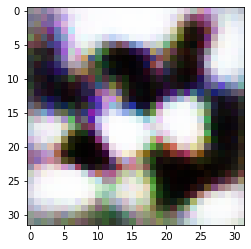

In [38]:
model.eval()
model = model.to('cpu')
a = torch.randn((1,64), dtype=torch.float32)
out = model._decode(a)
out = out.squeeze()
out = out.permute(1,2,0)
plt.imshow(out.detach().squeeze().numpy())
# plot_image_output(out)

In [210]:
out.shape

torch.Size([32, 32, 3])

## Evaluate the model

In [86]:
model.eval()
model = model.to('cpu')

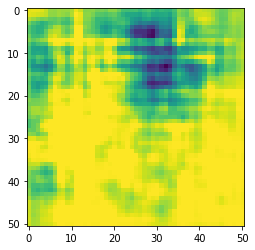

In [94]:
a = torch.randn((1,128), dtype=torch.float32)
out = model._decode(a)

plt.imshow(np.log(out.detach().squeeze().numpy()))

### Small sample of the model to evaluate the results

/scratch/sagar/Projects/radio_map_deep_prior/venv/lib/python3.6/site-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/scratch/sagar/Projects/radio_map_deep_prior/venv/lib/python3.6/site-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/scratch/sagar/Projects/radio_map_deep_prior/venv/lib/python3.6/site-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.activ

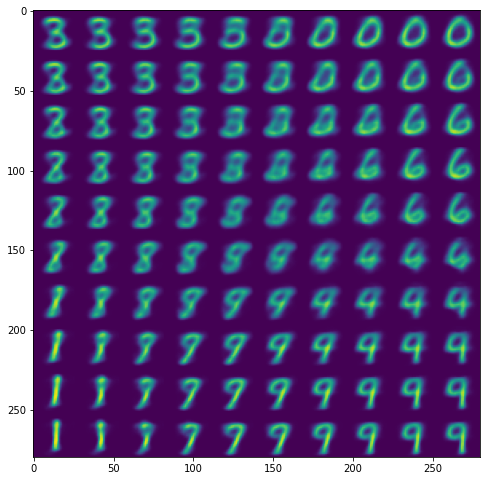

In [9]:
mnist_model = torch.load('trained-models/b-vae/mnist_model')
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAP8AAAD6CAYAAABuxZF5AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/Il7ecAAAACXBIWXMAAAsTAAALEwEAmpwYAAAsoUlEQVR4nO2de2xc93Xnv+feuTPD4fAp6kGJkijLsmPHduSt4qR1sk2dJk3TR9IiCBIUC+/CgIFFdpGi3U2c7mKBLnaB5J+mAXbRrtEEcYE2TrYPJAiSZp3E6W4ecCI7diw/ZEu2ZL1ISiSHHD7mec/+wZE45/x+4sxQ5JDyPR9AEH937v3d33385s4595zvIWaGYRjJI9jqARiGsTXY5DeMhGKT3zASik1+w0goNvkNI6HY5DeMhHJDk5+IPkBEJ4noFBE9slGDMgxj86H1vucnohDAKwDeB+A8gJ8B+Dgzv3i9bYaHA94/Fjb34ayjR6PHV1HfV8tx2tOH7DdAvObnPlIkt+kLqqJdZreP+XqPaJM+GrVJLQ6hIZLbxGo/UVD3jreZSpwS7VJdtn3H74xVUWd53kN1fgAgUGOvxXKbumoHgbtP93aUY015jr8/Ksn9sjyvdXUOe9S1BIB8IPvQ50hfBwCI1Tp1dW+W4mjNcQHueU8HNdFOwT3PTh9N5/3yhTKKM7XWNziAVOtVrst9AE4x82srA6DHAXwIwHUn//6xEN/61si1duSZ/PpQS+puuFiTE+zZ0gGnjyrLw+oLl0W7wq0Pe0e4INq/2nNJtF+ruV863y3eJdp6ggSqPVXpd/qISN7cS+rLbV9m9jojXuVcaVi0T87tFu0auz/49MTVYy+U5Hnvy5SdPnpSclJNL+dEe6GUEe1cpuL0UanJCRKrL4zdfUVnm/fuelm0r1T7RLtYy4r2W3svOH28O/eqaFfVOSrGsg8AKLGc3IW6PN6TpVHRvlyR4wLcL7Px7BXRHlb3oY9s05fZn/zeSy3Xv8qN/OzfB+BcU/t8Y5mAiB4mouNEdHx6pvW3mGEY3WHTHX7M/CgzH2PmYzuGzb9oGNuFG/nZfwHA/qb2WGPZdWEAzT9ylmLX5ispu0j//KpAf+4eQr2FTV9V+1iouz/p9qQKoj0S9op2iCVnmx8qW1L/zNc/R88tDzl9aNuyVJc/La+U86LdE7r267nFQdGeWpDbLC7Jn98+9DjiqrwOC33uz379M75QlKaC/gm/XJLHBrh+gMqyXKfXYyos1eXxLNZke0GZaOXY3W9RmVfa/BoMpOkIACWW517/7Nf3mb6XASBgeY/kAnl8O1LyZ3/J4+NabFrGHt/E9biRR/HPABwhokNElAbwMQDfuIH+DMPoIut+8jNzjYj+HYDvAAgBfImZX9iwkRmGsancyM9+MPO3AHxrg8ZiGEYXMQ+cYSSUG3ryd8oyp3CisuNa+0LVdXhNVgdEe7YmnSgZFQRxuSKdWYAb5DIQSWeNdpoVKtIxBQDFQekE/PWep0W76gmK0Y7GknJEXSgNivbZeff4Q/W+vVKXTqNiWvY5kJbBKQBQVcFDAz0qCCZ2v/MXZuV5pmXZB1XksbnuTqCkHHjxrBwrK2dePe159av8VVSU13Jx0HV4jaVnRDurHK867uFSRd5jALCYlWN9S1rGU+Q8MSkzsbwXC7E8K9pp6AvqaoV2aC96HH7inmnf32dPfsNIKjb5DSOh2OQ3jITSVZu/GPfgyeId19on53c768yUpO05uyTtcR3ksavXjX3Op2QAynIgbdHLy9Lmr3hsscmyjLtfUgEdi54Apbna2kEey3U3uERTVPHvOhBmKS1tvkrOHXs+kueoJ63GXnHtxoWqSqApyudCuqCSWObcwCgVn4JQuSOUCwSlna7Nz5HKMViW+9WJTwCwP5oWbR0Y88qivM9mKvI6AcCPwttEuxCfF+3D0WVnGx3vP1GTvgRt83uTklLyJOmAs8FwUbSXYjdAqzkvw5eAdD3syW8YCcUmv2EkFJv8hpFQumrzl+shXl9cfc8/sejmN+ucb23j9UTSfj2Qc/Pb39X/imjnAukDeDpzSLQvqvfvAHBPXtp8OrFnxPPKdjgl7bPJqvQbaHvMl4RRLCh7dFFeolqfPH6fDTxTlGONIvk+ujjpxkYMPid9C/lL0j4NqnI/1bz73Oi5rMZWl9vMHZLXNk67fcTa5i+1Pmf7UvOiPR1LP9GsiuM4PTMCzfmFQdG+OCjb53ulngMAFJV9rmNSdLxJser6SfS7/3wo79XJqhyH1ndY2WbVb9COUM1V7MlvGAnFJr9hJBSb/IaRULpq86+HVCDfBY/3yThubd8DwJ7UXEf78L1/n6n1etZcG72NFpXQOnnafwEAQVra2nWlxRilpf2+p9/VtJtelLZncUHavNmL7vH2n5P95s610I7zCL8G09L2judkuy8l36XHkWu/1jPqeBfkfubvdrc5lFKCnTX57vycyqEoVzwCMNm1hVK1GCfg+nha+Xy0kCjg2vitdB917AgAhE3Kl62EWEXfba9pGMabCpv8hpFQbPIbRkKxyW8YCaWrDr90UMfenlVnnE6wAYB0KB0t+bR0iGhhjvFIFjkAgIMpuc6rNbmfQxmZpJHXGSgA7syuKUTsZSSSzje9H13k4UyPG2zSp463XJOXSAf17Mu5zs1qfW3RiPl+N9hkcbfcJl1QCSTKwZead88ZLyuF27pyXmZbi1loB1+0rARAam4fVcj9zNSl47UeS0dbf6879lJVnuepkrxnfE5hXV2nlViHr4+DWenA1g49n9Kwplnww4J8DMNoiU1+w0goNvkNI6F01eZPUYyRaDV4RAfsAMBIWgaXHMjIdXTRzXszriBEhqS9NqqO8l9mp0S7zK59n6HWtpbmE4OnRTsiXS1WjvVC3i2qGCg3wGgoA3ZCav19/YNluU6WZDDRd8ff6mzzj7fdI9pnF6VfYCAv7eTCvCuIEU/IIB6dc9R/RCZh7eyVQTEAcOriTtnnorwO/+He7zrbDAQyiOk9PfI8f+jg86J9a3bS6eN8RYp8DqmAnV0qeQgAciT9M70qgeyF8phoh56Ku+/rPSXaM8ovcKEuBUKma66frL/JZ5WmmvP59bAnv2EkFJv8hpFQbPIbRkLpbtGOOMKLxdFr7ZendznraDvwZMoV+RTre2yx9/fIPgL17nOBpW32VEkmYADA3apow2jKtbU0r6uEksMpaYvW1PvoizW3WIgu/DGWWvv7WfsRAOCVyl7R1u+Kzy7vgEbHBuiKurW6bOsEIwBYHpTLaEH2qYU4ynX39uMZGV+QmZPb/O0bb3e2ub9H2s1fKbxDtH8yJcVbTubde2pBJWHtyMh7yJeUc7RPCr5kVLGQ4/Pjou2rqHwkMyHaWgT0fEVeq7G0FCsFgL6mCsKBx69wPezJbxgJxSa/YSQUm/yGkVC6avPX4gDTpdW467k5911xYVbGZVMoXxbHJWlH/i+8x+nj+OAboj2aLoj2z+alDfha0bWB9/XKbb4w9k+i7SvU+Z2FO0X77T2viXakXnz/eOmI04e2G29JubEAzfz13L3Oskefe5dox/PS5qfYtV9z5+V5HTknbcdaTvonBhbc499VkD6NqCh9K5Uh6Vuppd2CmYevyG2oKsdx5ZJrr//+O/+tXFCQgh863uBcr5tTQUpEJT8g40m0DwQA5pUwaEn5ME5PyJiFdMa1+VvlB1RZ7ncgdEuk9gcm4GkYRgfY5DeMhGKT3zASSsvJT0RfIqIpIjrRtGyYiJ4golcb/w+t1YdhGNuPdhx+XwbwPwD8ddOyRwB8j5k/S0SPNNqfbmeHcZNDwpejklLBI7EKLomVA7DiEa64PSurq2g133JeOsCemdrn9jEgS87mAxkE8kZNCVfAVWudzkjn5Z5QBiTdqgI8fAwE0nmVU+239UjnJgAc2SsTlyBjfhwVYQA4Oyq/v6eVc05X0slNuBdPK+9m07IdlmUftR63j+J+eZ57rkhHHJPr0OJldRv3yntIBxflR9yEov2DBdnulUFemcANarozd1G0J6vSgTlZlBWpfBV0dbJPJiX3oxWgdfIQAERNyTwbqt7LzP8XgE6/+xCAxxp/Pwbgw23v0TCMbcF6bf7dzHz18ToB4LoxuET0MBEdJ6LjlTn3aWkYxtZwww4/Zmbg+r81mPlRZj7GzMfSA24su2EYW8N6g3wmiWiUmS8R0SiAqZZbACACMuGqfTI86FaFGR+QFsZCVdnas9I29dmvWijzrrQU1swFMhHk5J49Th//ZuT/iXZE0tY+HLmJPrcpX8OvKCGSISXMcTAlBT4B4KLyYeQCV2yzmQ/kXBswe/Dbor0zlDZun6pGAwDPjMlz8OWR+0W7Py1/tT0/pRwJAKZfHxTtlE7sUXebrsALAIF0tWBxr3w+LRxybe/bb5NiLAfz8rzvVAIxPjGPB3IyIGt3mHHW0WjBl6X4ddE+vSSDiXwCn+NZmaijK/TMqurQ2cANFGoWa/HNh+ux3if/NwA82Pj7QQBfX2c/hmFsEe286vsKgJ8AuJ2IzhPRQwA+C+B9RPQqgF9vtA3DuIlo+bOfmT9+nY/eu8FjMQyji3Q1saceE2ZLq06/K1f6nHUiVbRjflnavItT0gZ6Zdmt2vrT/C2i/Y7sGdHubUPk8ExV2mtHVXLQC1VlnAK4VJX+iIik2EOV5bE9V3FFRP5pTgpp/nvlezigREVeqLhvUB67/H7Rni1LX0PKY/NfWJDvqCcuqGPplbYmv+EmZeUnpA2fWlIxGf3y89yka59mZ+TYKJbrcOAKq54ekAk0Z1JSjLO8KO+RMOMe/5d2yFiQA33yPf+deenPAYBPDD8r2loU5vScvId8KTejWZlUpoVXyrGcor4CM/Vo9Qd8lVvHjlzFwnsNI6HY5DeMhGKT3zASik1+w0goXXX4MZNUiS24zrrJK1LRNyirpIwZ2S7tcgMnnuo/INr39ErFnGIsnYgnZkeh0Y6WnakfifZrFbkPAHhhQfbzfVXp9y1pGdTz1KJU/gGAHyul2fmaHOs9eelE/EnhsNPHz87JsVXmdcVdZxNkL0hHU17lvgRVlWA05arEDj4vnWQcKUXgnNxH9IZbYbl2Th5f6uB+0V7YJ6vgAEDlrIwcjablPTIwJQ84rLgnYG6PdGA+3S+v5Y/Gb3W2OXuXdCxOLkuH3+S0dKL25V3n7EJdXhtfJV+5vhv0VU2tnuf2Q3zsyW8YicUmv2EkFJv8hpFQumrzR2Ede/OrghZXhtwgHxXTgXhB20Cqkky/G7CxOy8TOWZUZdOyyjAhTzJETammnqvKYIxBj4qqTiA5HMmkjdsiGaD0H3e86PRRZWkn6ySUX8meFe0jaTeoYzwn93tiTibhXFxwg4uuZOW1KC3IcxQV5Lh0JR0AqO1YO2uzlpV9pPp7nXVShw7KcRySgTJF19WC6m4ZgFTrk/sJVLJUz2WPZawWsXYl1dzjvbSsKuguS79BvSLvoUzkqXKkbPxQ3Yta3Tci935vXta+dq89+Q0jsdjkN4yEYpPfMBJKV23+TFDDeH7VHq0dcL97UkrMYK4i32vOLEq76nf2n3T6+I2B50V7vxLwPFuTSSsLw65ww/6sFIQ4mpHvn7Me2yvol2N/a3ptGzgiN0bhP4+cEO3QUTmV/otDkSvu8P6cPP43hn8i2s+UXfGS7xbeKtoTJekDOD0jbe+CR7C5mlfHq0IBSqooc7rgVkrSIp91JQJaP+z6WvYMSbGWqWnp01g4KK+vTzhU2/xVdS0zg25CzS15GafQrwRetP1+17CbHPRL+TNyv6zFXKRYi8/X1CxQm24jae0q9uQ3jIRik98wEopNfsNIKN0V8+AAc9VVu/DCnFulVb8LXa7I96C5jBTR2JcpOH28PSNt/Loy6J5XfgQtoABIUUQAiJQvwvetWdUKlRtAmeU4tGhknd0Y+2WW50iLUdbZHb3OZWiupgxA5mTAL76Zm5R+kPS8EmapybGnXDMaQVUX9pCfz8+5+SBzyrcSV+RYKSX7rObd9/xhRR4Pq212Dbhis0d7ZcGUYlaO40iv1LXV1aIB4Igq3BKra6PvwwFP0Y5m30K4kUU7DMN4c2KT3zASik1+w0goNvkNI6F02eFHWKytOmwWFl1hgsKSSrpJS4fWUko6r87sdANFLual82aiLgNWnl6Ughk+Ndu6+l7MqYCNszVXvfYXy1J4Yn/0rGjfl1lbqAFwnXUnq3IcIaTDRzsiAWCiLoNNekn2+eOiK0zx6pxUwH1jQgpVBFPS0TZwyXUsDbxYEG1almPNXpDXW4t7AABV5fFUdijn7KAbkFVk91o0wxnZZ80ttuTk7QQ75Nh9ATq/oar8XKzLc3ShNijahbo7Th3U08phpwOHACDbtCwwh59hGK2wyW8YCcUmv2EklK7a/CEx+lKrtpRPREOT6ZFBDvkeaYv9i7wUtwCA2yIdCCIDNO7rlbbaYuwGjhxOywCNMVUpJ0tK4RLAt1WAxkWVQISMGyiiyauqvHel5fHX1Slb8gT5ZEkGOZ1WlYTOLbtJOcWyPAe8vHaF3eVdbpDP7D2y357LcuzlIdlJud8TbDQs+9UujeXd7j0TDctooeF+mfwykJGfTxRdEZmFojzvI6qC9NG8DOgBgFF1T4yE2ndUEC1fUk4/yfs5oxLGqur53NdizpiYh2EYLbHJbxgJxSa/YSSUrtr8ABA02SzDA67dXM7JIe3uk0INt/RJcUpdgRcAIpLvU98SyXfDtyphTZ0s0xipZ9kqI6ErPvmb/c+J9u2RLtLgbtMKZ2zKqKvGbozCIsuVsoG0vZv9LlcZzsmxlkaUsGQoje/qPvfWmRxV1YDnpR+hukfGG4zslNcWAO4YVOKjE7J4xt27pKApABzqldu8rde1z5vR1ZQBoKiKYWjh1N/z+JYAVSxEibPcldb+GFd4JUNu3MKNENFs65Ua2JPfMBKKTX7DSCgtJz8R7SeiJ4noRSJ6gYg+2Vg+TERPENGrjf/d31KGYWxb2rH5awD+mJmfIaI+AE8T0RMA/jWA7zHzZ4noEQCPAPj0Wh0FxMg0FSEYybk2vy5ScKBX2jAjkXz/ujfV+s2mI4KpXpUuxK6qhH7f3g5azGOJOymb2B5LsbSb5zw2/7Ol8TXH5SsGOVWU76wrZVW4s1eeo5rnfTOHuvKFWqEmr0Ol5gqYTi3Jd/DLBVVUteYWVT3bK587Mzulb2VA+V5G0zIOAgBygTyvJSXwcrHmyWVww0MES7Fr42syYet8j82i5ZOfmS8x8zONv4sAXgKwD8CHADzWWO0xAB/epDEahrEJdGTzE9E4gHsBPAVgNzNfTXWaALB7Y4dmGMZm0vbkJ6I8gL8H8IfMPN/8GTMzrlManIgeJqLjRHR8edYj2mYYxpbQ1uQnoggrE/9vmPkfGosniWi08fkogCnftsz8KDMfY+ZjPUOd29GGYWwOLR1+REQAvgjgJWb+s6aPvgHgQQCfbfz/9VZ9RVTH3ia13UzgOkQC5UjKh2XVlr8e4jacalrh9o2aTLCY8ST2HFUBGm7lHJf7s1rx16MacYPkAjnWSDkAATeo53xJCp5MLruJLfOzMkCHVJXewqJyTKXchKL0tKrkOy2dsVFR9lEsu9WC5zPynKUn5DhqefeWnemT5+RHSiSmt0epGfe5wUWsAqPGVTDZcMpNytqfkoFAhVg6q7XgS9ZTTecgpNO7qu7nkOS4dgRrV4HiDsQ82vH23w/gXwF4noiebSz7E6xM+q8R0UMAzgL4aNt7NQxjy2k5+Zn5h7h+puB7N3Y4hmF0C4vwM4yE0vWKPbNNdlAmcG0gbfNHStxACxyerLqJEfcqmzdQ33FjKWk39XqCfEJqEcHhIVA/kLSvoR2/QadoQQkAuC2SvtdiXR7vr+16xdlGV0c+c0UKeNbrcuxB4Nr89UPyWhVVchD1yM/HdrtJKINZGZDzfCxFUX2Pq+yA9Av1qKpOO3ulXT2ccUU1tIjrHb1SsHNH6Nr8xRY2/oQS8PT1cV4FD5VUQJa+/wfSnurQ63yG25PfMBKKTX7DSCg2+Q0joXRZwDPGQGrVprs14wozBMr2LNRlksaeVEG0x1JaMAPIdPh+fZdHmGM9xK0KLmzIXlpzNCP9IIei10X79ar7nT+UknbxL/rGRFsnAxUqbgGKiqrku7RD+k2ODFwW7bv7zjt9DCu7uBbLsVZj9yyO9RZEWyeH7cmIgFQcyshxAG7l4ruz50T7zsi1tXtInwPpSxhUFXWHvcVhJEVPolYzGWef/krN7WBPfsNIKDb5DSOh2OQ3jIRik98wEkpXHX4xCEtNlUx1JVwACCCdF73KaaIDJSbrbjDOWNc1iVdYiOVYF5UjRlf92SyqLJ1GZcch5J53XaFoKacqzpalWs6CJ7hqQiUM1VRg0FxVJtycWnIlIHpCuZ+6cvhFHqfZpSWZIKSTdGaVc1Kr9gDAXE0GQul7c2fgBkYVlX+3xPKc6Aq8gKuarKssF3ltZZ8ye5LhLMjHMIxOsMlvGAnFJr9hJJSuJ/bMN9lWZ8sjzjqzKjniQGZGtLMkbZ7B0FUAdkMnukO/Uvwd2oBEHh3AMR3LoKaMZx86UKRVwgng+lZuz8jElonygGjH7O5X29pjA1Ilty+S+5gquz6QWPXRl5ZJVzrxCwDmK/K8Ty3IfiNVPVdX5wEg7kvAtdernqz2W9TsKSifz8W69AFo+35lP/I86vNad/a7cfe2PfkNI6HY5DeMhGKT3zASSldt/nKcwpnFYdHW6Pe4B9MyCePd2SuiPRS6iQ5bxWaIdeg+h5RfIYZrR87w2nbhztS8s+zuSCalRGq/MeR77qHIFcQYyuwU7cM5ee20+Opczb12Y2np49kXScGPvsBN5Lpcl+/5TyzLpKS7emQC0Z7QrdjzckVWAjqSnhDtgyk3nkRXUM6ry6/Hqv0ZAFBS16quKvlq8Zq6EzsAVJu2aZVc1ow9+Q0jodjkN4yEYpPfMBJKd6Pg2W/3NLM7Le3RX+2RxRMGgu1j428FEWmbz7UBd6tqucOhG1OuaXVefysn7WSf3XxHVsblj0fSP7M/Je3ZYuzap+MpOQ7Xj+J7Xsl8jw/3vuxZZ5W65x4cDqXgSVbFE3QqEAMAA6rAhi8u35EDYXmt9NGG5E5ZXeijXezJbxgJxSa/YSQUm/yGkVBs8htGQumqwy8d1jCeXw3i8Cmx6golJyoyOeJtKtEjHyS77LfPiVRmqV4bqEqvWY/TSDOnEoiOqyScl8t73W08QTvNXK5LZ1bJI1wRQAbXHGjpAOycqboboHSxJgOFhkO5zj6PQm6nY9FBQT76lNBIO3torlTdievPnvyGkVBs8htGQrHJbxgJpas2fzao4rbcqk234BFVOFuS1WH/GXeI9vMpGdDx0MAbTh9uIEyyqCvLL6dsTZ/go7bxX6rIRBZdOcln359XIp8DKWk36+vtClwCF6qyD51g8/6c6+PQnK7Ke2QklPu56BF9nY/l2CKSfpNldkU/87Tx/qaBYB3VoZt8OmuH0KntOt6TYRhvCmzyG0ZCaTn5iShLRD8loueI6AUi+tPG8kNE9BQRnSKirxJR579XDMPYMtqx+csAHmDmBSKKAPyQiL4N4I8AfJ6ZHyeivwTwEIC/WKujoWAZv9934lrb99bzrBJS1FV700q8IiK3eMSbiVYCnj4bMWxh+QWez7Xo53QsbXwtlHpLRhb5AIBh5Y8ZT8vEnkJd+gkGQ/d9e0X5AbKBtPF1QRIfGXV4Oq4hq+x531h0vEl1nZVwO0XHArRTgTdcp6hnyyc/r3D1qkaNfwzgAQB/11j+GIAPr2sEhmFsCW3Z/EQUEtGzAKYAPAHgNIAC87VQsvMA9l1n24eJ6DgRHZ+e6c63p2EYrWlr8jNznZmPAhgDcB+At7S7A2Z+lJmPMfOxHcPmXzSM7UJHs5GZCwCeBPDLAAaJrhlTYwAubOzQDMPYTFo6/IhoJ4AqMxeIqAfA+wB8DitfAh8B8DiABwF8vVVfaQpxoEWl2lE1Il1hthhrZ82by+G3FMtgksm6bkuH6K2RTHQCgMt16fHaqxxcA4HranX1gWSg0JFIKvfsDYtOH0ucUutU1Odalcl1PGrV4Jx6idROANfuUJ4jvc3O0A3YqSoFnVwgz9lWBY61kzyUaXKd+5y516Mdb/8ogMeIKMTKL4WvMfM3iehFAI8T0X8D8HMAX2x7r4ZhbDktJz8z/wLAvZ7lr2HF/jcM4ybEPHCGkVC6q97bBjqI43xNC0BI22sgcAMcbpbEnleqboXhy8qmzyoTbm9KB/nI9QGgxHKdagvFZAAoqnV0ddjXqlLsYqre5+43VgEqqtKvDtCqww226VPBNfmwk1QVPzpQpu5Ru11UwiKBWseXDNXpfjejohPQmZ0vtzMMI5HY5DeMhGKT3zASSldtfgYLO8hnA+mqs1qIQSdp3Cz2vQ9f5RidUKKr3OwKW1eOGWsRS+Hjtkgm8hRjWTnpsrLxl2I3viJLcqzaxtfvzrV/AwCqgfTxDIfyfMQee31JCW1cqctthgN5n/nSYAbVfvuULykXdH5OtZBq5Kmu1Or+bcdv0Ell3mbsyW8YCcUmv2EkFJv8hpFQumzzSztIx20DQAr6PX7rQgc3K1XPd68uZFGMpS26q0sujl/KyGvzUmVWtLXAJQAcy0gxD7dKrY7bd8U8ZmJ5Sy7F0o+Q89wPM8rG17EgGWVX5wP3JA47Nr7rj+iUdvxR2qbX9ruOe/HNmeZ1rGiHYRgtsclvGAnFJr9hJBSb/IaRULrq8KtyLMQp9pIb5OIkXahmqLZpp/LpdmVP6IabDAfSadbncU5tBftT8jkRY8FZJ99CSVknx1Tb8E5VWzjAVsYiiZTic0aNyxcosxnBYuvps5tX2578hpFQbPIbRkKxyW8YCaWrNn8FIc7VVxMkJus+IQ657NXKbtG+XJOiEjmVkAEA786dFm2dtLJd8FXb0Xaxthu1zbtZiU06+EQLpxZjNwjmdE2KiETKXl9SwTdnaiNOH0ciKfIZKaGKJY/NX4jledRJSIPBjGjv8ATwLGgBz3UIh24G7ey3eR2r0msYRkts8htGQrHJbxgJpcvv+UNM1AautQt11xafrcllP5/fL9qTS9Keu2Nw0umjL5S2522q4ISmzFVnWTfiB3QSUzt0y/bUNnA7vFYdXvPzqVrngiBIzTvrtGJPKLfRT7iaR85DJwctkbyHdoWywjCweYKcnWICnoZhdIRNfsNIKDb5DSOhdPc9f5zC6+Vd19qvLO521lmuS1v74sKAaBeWs6J9Ih51+ri1Z0otWdvmv1x37duysnkPR50LOLZiPTZjtwpBaLHJUMXLB6Qj6l17vdm/AwBXVIzGnEfAU8dtaL/QYOgWOrld+XRcAVPpW9DnEHCLo+QCffzb9znZPDbqwP7fvkdkGMamYpPfMBKKTX7DSCg2+Q0joXTV4ReDsNSUhJEJXQXYw7nLoj2iFGHfWJSBJLmUrNYCAHujWWfZWvgEMy5W5ak53FGP3cPnvNoI51RVBcJokZWY3X1UVOLOYCjVebUycT4sOX30q2W6zz2hKyIy6gnAWQvf+RkOpVNwPQFYNxv25DeMhGKT3zASStuTn4hCIvo5EX2z0T5ERE8R0Ski+iqRp5qAYRjblk5s/k8CeAnA1UiNzwH4PDM/TkR/CeAhAH+xVgcMQjVetaV0QI+PHZEM6ij3yCHPVlx7b9GTMLIWuqorAFS5sz7Wg89e15Vdl1TS0WRdV5x1gzpuUVc1H2SddTStKsNETkUbNxkqq6r4DIdynVsiKapxpjro9NGrgnxeLu8V7Ym6G2z11rSv7m5n6MpAGZI+jtBznreLeGzzfcQd1Oxp68lPRGMAfgvAXzXaBOABAH/XWOUxAB9ue6+GYWw57f7s/3MAn8KqSvIOAAXma4+p8wD2+TYkooeJ6DgRHV+a7TxN1DCMzaHl5Cei3wYwxcxPr2cHzPwoMx9j5mO5oc3/KW0YRnu0Y/PfD+B3ieiDALJYsfm/AGCQiFKNp/8YgAutOmImVJve215cHHDW0csyKSUcWZFfIMyuLfZcVgqAnM6dEu2xlOzjnEo4AYDhUFeQbW03d4q27wHgfF3anpdV8suF2pBo+96399I50c638ftuQVUDHlLvzrWIyH7n/LgVdFOQfej36zly4zGuKD+QTijy+3PcsXRKpMamr41PMKMbNv9mJnK17ImZP8PMY8w8DuBjAL7PzH8A4EkAH2ms9iCAr2/YqAzD2HRu5Gvk0wD+iIhOYcUH8MWNGZJhGN2go/BeZv4BgB80/n4NwH0bPyTDMLqBRfgZRkLpamJPiuoYiVYTMyqxmzyxUJYOnf6sSvSoy22WK67TRSf/PN0v30JeqEvll6eW3LSdUZUcdE/6irPOjZIh9/RHkIlKdfX9XFQOwKwn2OblqqyEU+EZZx3NEsux3OXpt5mSJ0Apr8bayjm1O3SVfEJI1dxb0lKVaTBwk4E2whnbo4KaetYniLvhaKXh0PO8bl6n/RAfe/IbRmKxyW8YCcUmv2EklK7a/JodWVeJdSgjAzYG0tLG6w2lTZwK3KSOZr8CAIxH0l7vUyqzY2nXJt6TKrgD3mB8NvFYqketI4+lFMsqtr5quZqZWNrE057kmBm1LEdnRLs3UOq9nv10Wk1IJxMBwJIyWvcotV5d+Xej2Ax1Xh2g46sU1CpQSIuo1OH6WprP44Yn9hiG8ebDJr9hJBSb/IaRULpq86eDGg42vS+/lHMTe4ZSyuZX7blabs3PAeDOjMwx2h/KpJWQ5EtcXxWYHYHud+MzEn1iHhr97axFMdPk2pGLLN9Zh8oO9PkJJqvyWpxNyQQiXUlnp3N+3GrHWiBDJ888VXarNFdZVvKNlECIe13c/W4XkQ2dHHSp7orNjoby2vhiP1oRNN0lVrHHMIyW2OQ3jIRik98wEkpXbf4sVXFn5tK1tk+YQdt4u1JF0b4QSFt0n6dAx51puWxXuLaoxN2euP2+Lrz39aHfleuKs8OBtBuvxPNOHxN1eV614EdfIOPnAQhfDAAMKtt6WBXT2Bm4tuWMqnY8o3I3FlUBjonaoNNHVa3Tp2L5Bz1jDzbgGdaN6seRxxyPPe/t5TatYye0D6td7MlvGAnFJr9hJBSb/IaRUGzyG0ZC2dLEHi1UAQBZVSlFO6eOZKRTSSd+AK5IRCvnzYGUm+iyGWyEEykXyACe3R5nz6IKrplhmdiz5HG09oXyPAdKNbcQy/1mya3BUIjl7XSxJgOHJlT79fJOp4996bUrLPsqFHWaUNQt9LXa5wngaXVPtHVkTVOmE9efPfkNI6HY5DeMhGKT3zASSldtfgah2hRwkiU30UFXae0lnRwibVFfsMl2tQE3A18SS1+gE5mkPV9lKWAKrARgiT5UWwt81tvQjNB9Vpw+3GdPWgV5HY4ui/ZtvkiZDSCGrsq78WxG4JDu1xJ7DMNoiU1+w0goNvkNI6F01eYnsBCWKCnRCQDoZekHqKjvp0glQix6kmWGnCXJoi+QFuugsgNz5CYD9Sp7tKpsYH1dhgP31ulzBDllctC+SAqlhp6kFi1WEqi4D22bbxQ6waauqj9vlr2+lbz5jsgwjLawyW8YCcUmv2EklC7b/PI9fb9HmCFU7/H1++as+jw5b/TbZyBYu5BHvo2vfC1uoW1tXyxFj9pGx3FkSRYc0UIdK+vI6z0cyPf+AVw/0UaQ6sKd5BNz2Upfgj35DSOh2OQ3jITS1s9+IjoDoAigDqDGzMeIaBjAVwGMAzgD4KPMvHY+pmEY24ZOnvy/xsxHmflYo/0IgO8x8xEA32u0DcO4SbgRh9+HALyn8fdjAH4A4NNrbcCASOzRghEAEKhgi7JSc61CB6O4FWtysXQktnKAtaOq245jppUC7Ebtp9NxrAdfRdlmyp596Ao9RWcdVSnJ4/DT1YWySqxEV8EBgIxKGGp13n3HpisG17WDk12HoHZ6tlLiLXnGnleVoFqN3Xd/NK+zGVV6GcD/IaKniejhxrLdzHxVh3sCwO6292oYxpbT7pP/Xcx8gYh2AXiCiF5u/pCZmYi8XzmNL4uHAWDPPnsxZxjbhbae/Mx8ofH/FIB/BHAfgEkiGgWAxv9T19n2UWY+xszHhobt5YJhbBeIeW0bgYh6AQTMXGz8/QSA/wrgvQCmmfmzRPQIgGFm/lSLvi4DOAtgBIBbJmd7crOM9WYZJ3DzjPVmGSewOtaDzOwqo3poZ/LfgpWnPbBiJvwtM/93ItoB4GsADmBlQn+UmWeu043u83jTW4Ntzc0y1ptlnMDNM9abZZzA+sba0uZn5tcAvM2zfBorT3/DMG5CzAg3jISyVZP/0S3a73q4WcZ6s4wTuHnGerOME1jHWFva/IZhvDmxn/2GkVBs8htGQunq5CeiDxDRSSI61YgN2DYQ0ZeIaIqITjQtGyaiJ4jo1cb/20IblIj2E9GTRPQiEb1ARJ9sLN9W4yWiLBH9lIiea4zzTxvLDxHRU4374KtEtDkKHeuAiEIi+jkRfbPR3pZjJaIzRPQ8ET1LRMcbyzq6/l2b/EQUAvifAH4TwJ0APk5Ed3Zr/23wZQAfUMu2a+ZiDcAfM/OdAN4J4BONc7ndxlsG8AAzvw3AUQAfIKJ3AvgcgM8z860AZgE8tHVDdPgkgJea2tt5rDeWacvMXfkH4JcBfKep/RkAn+nW/tsc4ziAE03tkwBGG3+PAji51WO8zri/DuB923m8AHIAngHwDqxEoqV898UWj3GsMWkeAPBNrKQhbtexngEwopZ1dP27+bN/H4BzTe3zjWXbmW2fuUhE4wDuBfAUtuF4Gz+jn8VK7scTAE4DKDBfy2/dTvfBnwP4FHAtN3cHtu9YbzjTtqsCnjczzNfPXNwqiCgP4O8B/CEzz1NT7vt2GS8z1wEcJaJBrISJv2VrR+SHiH4bwBQzP01E79ni4bTDujNtr9LNJ/8FAPub2mONZduZtjIXtwIiirAy8f+Gmf+hsXjbjpeZCwCexMpP50Eiuvrg2S73wf0AfrchWfc4Vn76fwHbc6zgG8i0vUo3J//PABxpeE/TAD4G4Btd3P96+AaABxt/P4gV23rLoZVH/BcBvMTMf9b00bYaLxHtbDzxQUQ9WPFLvISVL4GPNFbb8nECADN/hpnHmHkcK/fm95n5D7ANx0pEvUTUd/VvAO8HcAKdXv8uOyk+COAVrNh9/2mrnSZqbF8BcAlAFSu23UNYsfm+B+BVAN/FStrydhjru7Bi8/0CwLONfx/cbuMFcA+AnzfGeQLAf2ksvwXATwGcAvC/AWS2+pyqcb8HwDe361gbY3qu8e+Fq3Op0+tv4b2GkVAsws8wEopNfsNIKDb5DSOh2OQ3jIRik98wEopNfsNIKDb5DSOh/H9MJBU02/dxGgAAAABJRU5ErkJggg==
m, n = 10, 10
images = []
increment = 0.05
a = np.linspace(-0.25, 0.25, 10)
b = np.linspace(-0.25, 0.25, 10)
           
for i in range(m):
    new = []
    for j in range(n):
        out = model._decode(torch.tensor([a[i],b[j]], dtype=torch.float32))
        new.append(out.detach().squeeze().numpy())
    images.append(new)

plot_images(images)
# pass the vector through the decoder
# samples = model._decode(z)

# plt.imshow((samples.detach().squeeze().numpy()))

In [16]:
m, n = 10, 10
images = []
increment = 0.05
a = np.linspace(-0.25, 0.25, 10)
b = np.linspace(-0.25, 0.25, 10)
           
for i in range(m):
    new = []
    for j in range(n):
        out = model._decode(torch.tensor([a[i],b[j]], dtype=torch.float32))
        new.append(out.detach().squeeze().numpy())
    images.append(new)

plot_images(images)
# pass the vector through the decoder
# samples = model._decode(z)

# plt.imshow((samples.detach().squeeze().numpy()))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x2 and 16x1024)

### Linear interpolation between two images

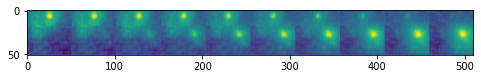

In [95]:
a = train_set[14]
b = train_set[12]
a = a.unsqueeze(dim=0)
out1, p1, q1 = model(a)
b = b.unsqueeze(dim=0)
out2, p2, q2 = model(b)
m = 10

images = []
step = 1.0/m
new = []
for i in range(m):
    sample = p1 + i*step*(p2-p1)
    out = model._decode(sample)
    new.append(np.log(out.detach().squeeze().numpy()))

images.append(new)    
plot_images(images)

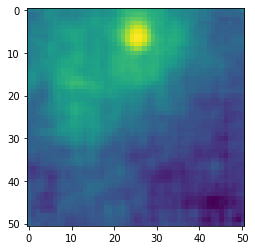

In [154]:
new = 0.005*torch.randn((1,128), dtype=torch.float32) + p1
out = model._decode(new)
plt.imshow(np.log(out.detach().squeeze().numpy()))

In [32]:
p1.shape

torch.Size([1, 128])

In [134]:
len(new)

1

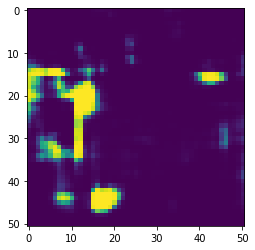

In [46]:
z = torch.randn(1, 128)

# pass the vector through the decoder
samples = model._decode(z)

plt.imshow((samples.detach().squeeze().numpy()))


In [48]:
train_set = SLF(sampling=False, normalize=False)

a = train_set[4]
a = a.unsqueeze(dim=0)
# model = models[3].to('cpu')
model = torch.load('trained-models/b-vae/param_tune/big_model_vae')
model.eval()
out, p2, q2 = model(a)

plt.imshow(np.log(a.squeeze().numpy()))

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

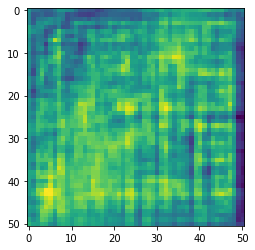

In [57]:
plt.imshow(np.log(out.detach().squeeze().numpy()))

In [122]:
sum([torch.numel(i) for i in model.parameters()])

39208433

## Hyperparameter Tuning

In [47]:
from collections import OrderedDict, namedtuple
import os
from run_manager_adv import RunBuilder, RunManager
from tqdm import tqdm, trange
from IPython.display import clear_output
import time
import torch.nn as nn
import pandas as pd
import torch
from networks.vae import VAE, betaVAE

DEFAULT_ROOT = '/scratch/sagar/slf/train_set/set_harsh_torch_raw_unnormalized'

if torch.cuda.is_available():
    devices = ['cuda']
else:
    devices = ['cpu']
print('starting')

params = OrderedDict(
    lr = [0.0001],
    batch_size = [32],
    device = devices,
    shuffle = [True],
    num_workers = [5],
    beta = [0.1],
    z_dim = [16,32,64,128]
)

train_set = SLF(root=os.path.join(DEFAULT_ROOT, 'slf_mat'), total_data=50000, sampling=False )

m = RunManager(epoch_count_print=1)

criterion = nn.BCELoss()
l2_loss = nn.MSELoss()

run_count = 0
models = []


run_data = []

data_load_time = 0
forward_time = 0

for run in RunBuilder.get_runs(params):
    hyperparameters['beta'] = run.beta
    run_count += 1
    device = torch.device(run.device)
    
    architecture['z_dimension'] = run.z_dim
    
    model = betaVAE(architecture, hyperparameters, dataset_info)
    model.cuda()
    loader = torch.utils.data.DataLoader(train_set, batch_size=run.batch_size, shuffle=run.shuffle, num_workers=run.num_workers)
    optimizer = torch.optim.Adam(model.parameters(), lr=run.lr)
    m.begin_run(run, model, loader)
    
    num_batches = len(train_set)/run.batch_size
    for epoch in range(10):
        m.begin_epoch()    

        total_kl_loss = 0
        total_recons_loss = 0
     
        for batch in tqdm(loader):
#             print('data loading time', time.time() - data_load_time)
            optimizer.zero_grad()
#             forward_time = time.time()
            if model.dataset_name == 'SLF':
                X = batch
                X = X.to(device=run.device)
            X_hat, mean, std = model(X)
            
            losses = model.criterion(X, X_hat, mean, std)
            losses['loss'].backward()
            optimizer.step()
            
#             print('forward and backward time', time.time() - forward_time)
            total_kl_loss += losses['beta_kl-divergence'].item()
            total_recons_loss += losses['data_fidelity'].item()
            
#             data_load_time = time.time()
            
            
        results = OrderedDict()
        results['run_count'] = run_count
        results['epoch'] = epoch
        results['kl_loss'] = total_kl_loss/num_batches
        results['data_fidelity'] = total_recons_loss/num_batches
        results['beta'] = run.beta
        results['batch_size'] = run.batch_size
        results['lr'] = run.lr
        results['device'] = run.device
        results['z_dim'] = run.z_dim
        
        run_data.append(results)
        df2 = pd.DataFrame.from_dict(run_data, orient='columns')
        clear_output(wait=True)
        display(df2)

            
#             m.track_loss(G_adv_loss=losses['beta_kl-divergence'], G_mse_loss=losses[''], D_real_loss=total_D_real, D_fake_loss=total_D_fake, D_real_count=real_count, D_fake_count=fake_count)
#         print(epoch, "total_Gloss:",total_Gloss, "total_Dloss:",total_Dloss, "mse:",total_mse_loss, "adv: ", total_adv_loss)           
#         m.end_epoch()
    torch.save(model, 'trained-models/b-vae/param_tune/lr_{}_batch_{}_beta_{}_z_{}'.format(run.lr,run.batch_size,run.beta, run.z_dim))
    models.append(model)
    m.end_run()

,run_count,epoch,kl_loss,data_fidelity,beta,batch_size,lr,device,z_dim
0,1,0,0.249137,-1.268699,0.1,32,0.0001,cuda,16
1,1,1,0.013917,-0.036937,0.1,32,0.0001,cuda,16
2,1,2,0.006965,-0.035635,0.1,32,0.0001,cuda,16
3,1,3,0.007949,-0.022845,0.1,32,0.0001,cuda,16
4,1,4,0.009004,-0.013358,0.1,32,0.0001,cuda,16
5,1,5,0.008587,-0.010803,0.1,32,0.0001,cuda,16
6,1,6,0.008424,-0.009858,0.1,32,0.0001,cuda,16
7,1,7,0.008169,-0.009086,0.1,32,0.0001,cuda,16
8,1,8,0.008021,-0.008531,0.1,32,0.0001,cuda,16
9,1,9,0.007822,-0.008067,0.1,32,0.0001,cuda,16
